In [1]:
import numpy as np 
import pandas as pd
import math
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker
import matplotlib as mlp
from matplotlib import rcParams
import itertools
import matplotlib.font_manager
import matplotlib.colors as mcolors

In [2]:
# 플랏 기본 세팅

# 센치미터를 인치로 변환하는 함수
def cm2in(value):
    return value/2.54

def kilo(value):
    return value/1000

def Mega(value):
    return value/1000000

# 폰트 크기 변수 
FS = 8
LEG_FS = FS-1

# 글씨 두께 변수 0.25 간격
LW = np.arange(0, 3.0, 0.25)

# 라인 스타일
DOTTED1 = (1, 1.25)
DASHDOTTED1 = (2.5, 1.25, 1.25, 1.25)
SUBPLOT_NO = list(map(chr, range(97, 123)))


loosely_dotted = (0, (1, 10))
dotted = (0, (1, 1))
densely_dotted = (0, (1, 1))
long_dash_with_offset = 5, (10, 3)
loosely_dashed = (0, (5, 10))
dashed = (0, (5, 5))
densely_dashed = (0, (5, 1))
loosely_dashdotted = (0, (3, 10, 1, 10))
dashdotted = (0, (3, 5, 1, 5))
densely_dashdotted = (0, (3, 1, 1, 1))
dashdotdotted = (0, (3, 5, 1, 5, 1, 5))
loosely_dashdotdotted = (0, (3, 10, 1, 10, 1, 10))
densely_dashdotdotted = (0, (3, 1, 1, 1, 1, 1))

def D2K(val): 
    return val + 273.15 
def K2D(val):
    return val - 273.15

# 기본인 폰트, 플랏 선 설정

PLT_RC_PARAMS = {
    "font": {
        "size": 8,
        # "family": "sans-serif",
        "family": "Calibri",
    },
    "pdf": {
        "fonttype": 42,
    },
    "lines": {
        "dotted_pattern": [1.0, 1.25],
        "dashed_pattern": [0.7, 9],     # only for grid line
        # "dashed_pattern": [3, 1.5],     # for data line 
        "dashdot_pattern": [1, 1.25, 4, 1.25],
    },
    "legend": {
        "columnspacing": 0.75,
        "labelspacing": 0.4,
        "numpoints": 1,         # legend number of markers
        "borderaxespad": 0.4,   # axes 틀로부터 legend 경계까지 거리 
        "handletextpad": 0.3,   # 선과 선이름 사이의 간격 
        "fancybox": False,
        
    },
    "axes": {
        "linewidth": 0.5 
    },
    "xtick": {
        "major": {
            "width": 0.5,
            "size": 2.0,
        },
        "minor": {
            "width": 0.25,
            "size": 1.0,
        },
        "direction": "in",
    },
    "ytick": {
        "major": {
            "width": 0.5,
            "size": 2.0,
        },
        "minor": {
            "width": 0.25,
            "size": 1.0,
        },
        "direction": "in",
    },
    "figure": {
        "dpi": 300
    },
    
    # Other parameters...

    
}

## CSV

In [3]:
# csv 파일
df_exergy_c_data = pd.read_csv('../data/df_exergy_c.csv')
df_exergy_c_check = pd.read_csv('../data_BL/df_exergy_c_check.csv')

## Timestep

In [4]:
# time step, 시간 축 설정
t = 600
hour_to_sec = 3600

winter_start_day = 24
winter_end_day = 192

## Plot code

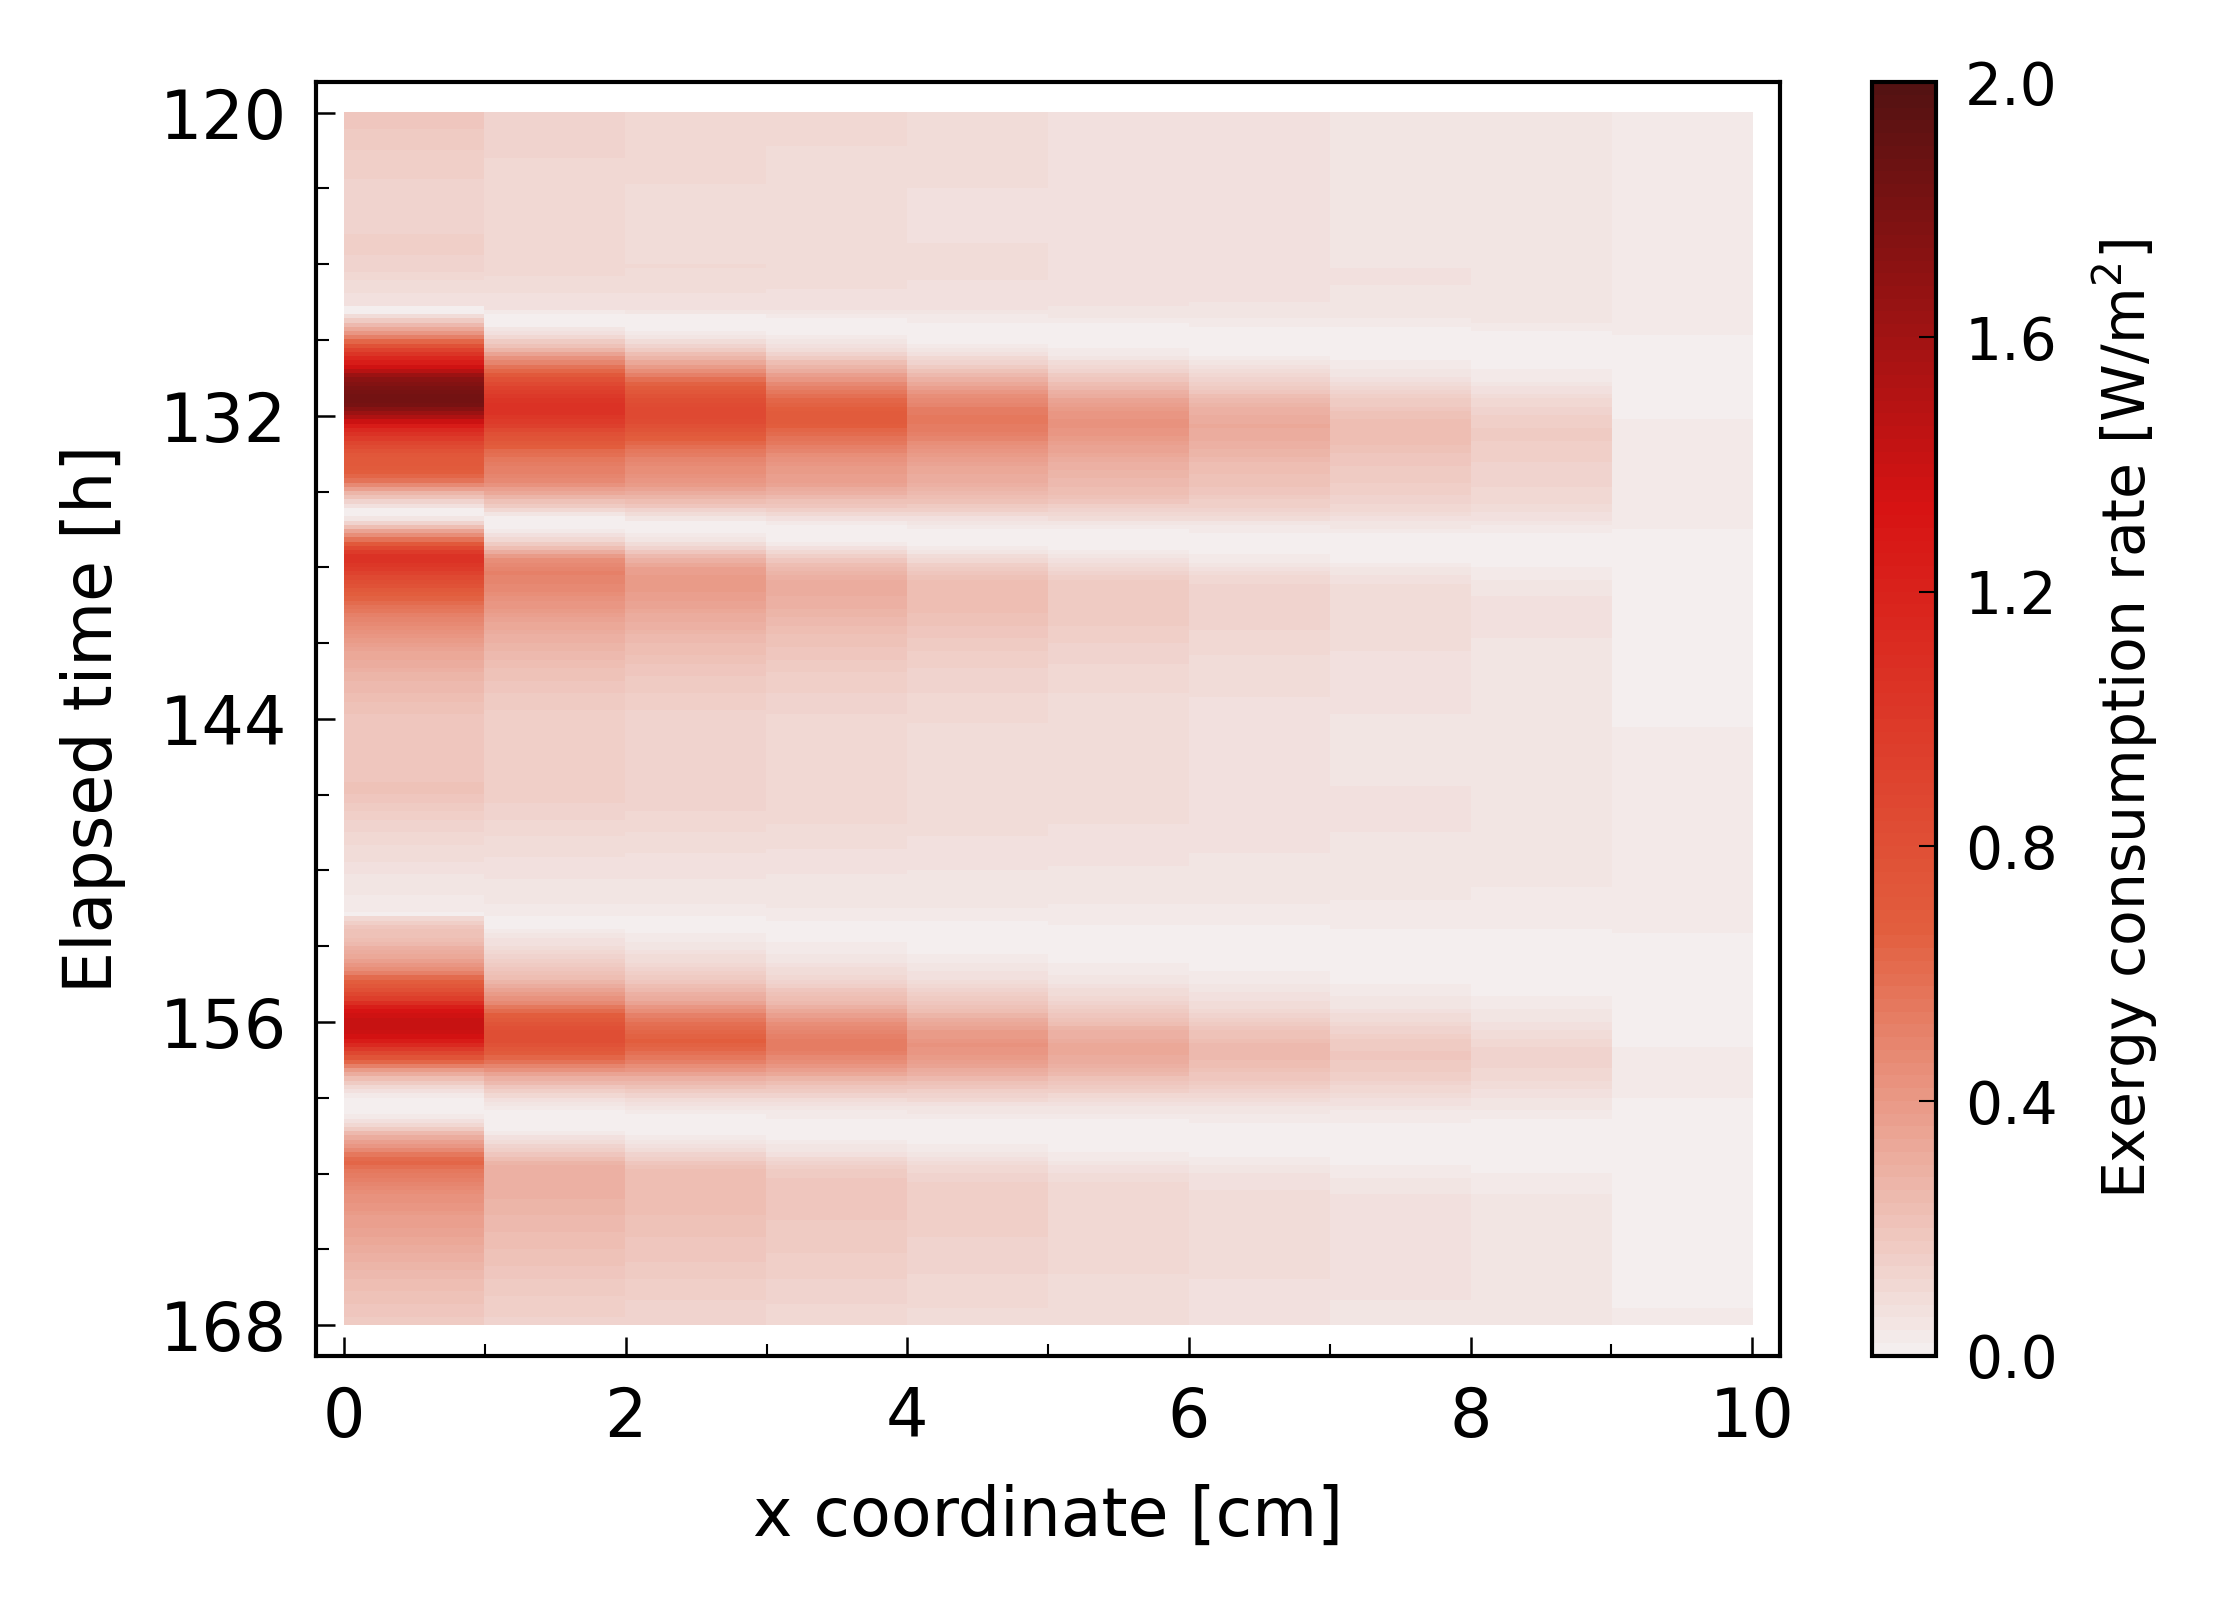

In [17]:
N = 1
nrows = 1
ncols = 1
nfigs = nrows*ncols

subset_data = df_exergy_c_data.iloc[int((winter_start_day+5*24)*hour_to_sec/t):int(winter_end_day*hour_to_sec/t),:]
# 시간 단위로 변환
duration = len((subset_data.iloc[:,[0]]))*t/hour_to_sec


# Create a figure and axes for the heatmap
fig, ax = plt.subplots(
    nrows, ncols, 
    sharex=False, sharey=False, 
    figsize=(cm2in(10),cm2in(7)), 
    facecolor='w', edgecolor='k',
    squeeze=False,
    dpi = 600,
    )

# tick settings 
xmin = [0]*nfigs #tick minimum value, nfig 갯수만큼 [ ] 생성 
xmax = [10]*nfigs #tick max value
xint = [2]*nfigs #tick Y_int
xmar = [0.2]*nfigs

ymin = [120]*nfigs
ymax = [168]*nfigs
yint = [12]*nfigs
ymar = [1.2]*nfigs

xlabel = ["x coordinate [cm]"]*nfigs
ylabel = ["Elapsed time [h]"]*nfigs

color1 = ['#F4EEEE', '#E25E3E', '#D71313', '#541212']
cmap1 = mcolors.LinearSegmentedColormap.from_list('my_colormap', color1, N=100)
norm = mcolors.Normalize(vmin=0, vmax=2)

# 플랏 그리기
for ridx in range(nrows):
    for cidx in range(ncols): 
        for i in range(N):  
        # figure index 
            idx = ncols*ridx + cidx
        
            im = ax[ridx, cidx].imshow(
            subset_data.values,
            cmap= cmap1,
            aspect='auto',
            extent=[0, 10, 168, 120],
            norm = norm
            )
        
        cbar= fig.colorbar(im)
        cbar.set_ticks([0, 0.4, 0.8, 1.2, 1.6, 2])
        cbar.ax.tick_params(direction='in', labelsize=LEG_FS, width=0.25, length=2)  # 컬러바 틱 길이 및 두께 설정
        cbar.outline.set_linewidth(0.5)
        cbar.set_label(r"Exergy consumption rate $\mathrm{[W/m^2]}$", fontsize = LEG_FS)
        
        # # 라벨 설정
        ax[ridx,cidx].set_xlabel(f'{xlabel[idx]}', fontsize=FS)
        ax[ridx,cidx].set_ylabel(f'{ylabel[idx]}', fontsize=FS)
        
        # 축 눈금 및 라벨 크기 설정
        ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='major', width=0.3, length=2.3)
        ax[ridx,cidx].tick_params(direction='in', labelsize=FS, which='minor', width=0.25, length=1.5)
        
        # 축 위치 설정 
        ax[ridx,cidx].set_xticks(np.arange(xmin[idx], xmax[idx]+xint[idx], xint[idx])) 
        ax[ridx,cidx].set_yticks(np.arange(ymin[idx], ymax[idx]+yint[idx], yint[idx]))
        
        # x,y 값 제한 
        ax[ridx,cidx].set_xlim(xmin[idx]-xmar[idx], xmax[idx]+xmar[idx])
        ax[ridx,cidx].set_ylim(ymax[idx]+ymar[idx], ymin[idx]-ymar[idx])
        ax[ridx,cidx].margins(x=0, y=0)


        # 보조 눈금의 수
        ax[ridx,cidx].xaxis.set_minor_locator(ticker.AutoMinorLocator(2))
        ax[ridx,cidx].yaxis.set_minor_locator(ticker.AutoMinorLocator(4))
        
        # # 그리드 설정 
        # ax[ridx,cidx].grid(True, axis='both', linestyle='--', linewidth=LW[1], color='0.25', alpha = 0.5);    
        
    
        # 그래프 외곽 라인 설정     
        for k in ['top','bottom','left','right']:
                ax[ridx,cidx].spines[k].set_visible(True)
                ax[ridx,cidx].spines[k].set_linewidth(0.5)
                ax[ridx,cidx].spines[k].set_color('k')  

In [59]:
np.max(subset_data)

1.8367624152297664

In [22]:
del ymin, ymax

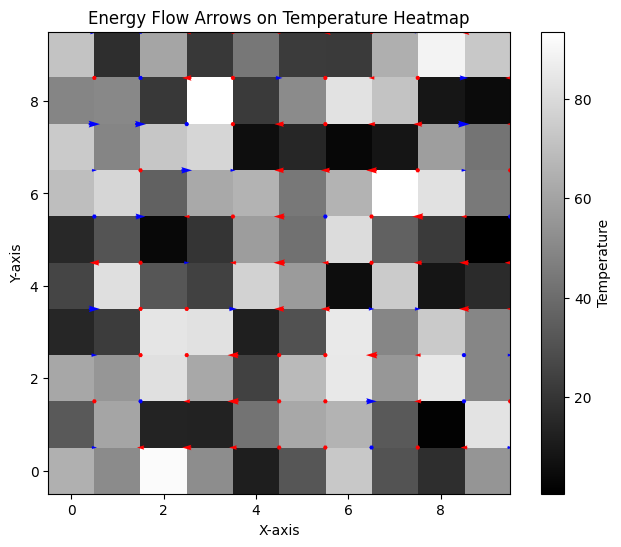

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 온도 데이터 생성 (예시)
temperature_data = np.random.rand(10, 10) * 100

# 에너지 흐름 데이터 생성 (예시)
energy_flow_data = np.random.rand(10, 10) - 0.5

# 데이터프레임 생성
temperature_df = pd.DataFrame(temperature_data)
energy_flow_df = pd.DataFrame(energy_flow_data)

# 히트맵 그리기
plt.figure(figsize=(8, 6))
plt.imshow(temperature_df.values, cmap='gray', origin='lower')
plt.colorbar(label='Temperature')

# 에너지 흐름 화살표 그리기
x_indices = np.arange(0.5, temperature_df.shape[1], dtype=float)
y_indices = np.arange(0.5, temperature_df.shape[0], dtype=float)

X,Y = np.meshgrid(x_indices,y_indices)

U,V = energy_flow_df.values, np.zeros_like(energy_flow_df.values)

positive_arrows_mask = U > 0   # 양수인 값들에 대한 마스크 생성
negative_arrows_mask = U < 0   # 음수인 값들에 대한 마스크 생성

plt.quiver(X[positive_arrows_mask], Y[positive_arrows_mask], U[positive_arrows_mask], V[positive_arrows_mask],
           scale=20,width=0.01,pivot='mid', color='blue')   # 양수인 값들에 대한 화살표 그리기

plt.quiver(X[negative_arrows_mask], Y[negative_arrows_mask], U[negative_arrows_mask], V[negative_arrows_mask],
           scale=20,width=0.01,pivot='mid', color='red')    # 음수인 값들에 대한 화살표 그리기

plt.title('Energy Flow Arrows on Temperature Heatmap')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')

plt.show()